In [1]:
import pyfredapi as pf
from dotenv import load_dotenv
load_dotenv()
import os
import matplotlib.pyplot as plt
import pandas as pd
import json

api_key = os.environ.get("api_key")

corecpi_data = pf.get_series(series_id="CPILFESL", api_key=api_key)
corecpi_data_not_adj = pf.get_series(series_id="CPILFENS", api_key=api_key)

# Convert 'Date' column to datetime format
corecpi_data['date'] = pd.to_datetime(corecpi_data['date'])
# Sort DataFrame by 'Date' in ascending order
corecpi_data.sort_values('date', inplace=True)
# Calculate month-over-month percentage change
corecpi_data['MoM_Percentage_Change'] = corecpi_data['value'].pct_change() * 100
# Calculate year-over-year percentage change
corecpi_data_not_adj['YoY_Percentage_Change'] = corecpi_data_not_adj['value'].pct_change(12) * 100

# Merge YoY_Percentage_Change column from df2 to df1 based on 'Date'
corecpi_data = pd.merge(corecpi_data, corecpi_data_not_adj[['date', 'YoY_Percentage_Change']], on='date', how='left')

print(corecpi_data)

corecpi_info = pf.get_series_info(series_id="CPILFESL", api_key=api_key)

    realtime_start realtime_end       date    value  MoM_Percentage_Change  \
0       2023-05-13   2023-05-13 1957-01-01   28.500                    NaN   
1       2023-05-13   2023-05-13 1957-02-01   28.600               0.350877   
2       2023-05-13   2023-05-13 1957-03-01   28.700               0.349650   
3       2023-05-13   2023-05-13 1957-04-01   28.800               0.348432   
4       2023-05-13   2023-05-13 1957-05-01   28.800               0.000000   
..             ...          ...        ...      ...                    ...   
791     2023-05-13   2023-05-13 2022-12-01  301.460               0.399319   
792     2023-05-13   2023-05-13 2023-01-01  302.702               0.411995   
793     2023-05-13   2023-05-13 2023-02-01  304.070               0.451930   
794     2023-05-13   2023-05-13 2023-03-01  305.240               0.384780   
795     2023-05-13   2023-05-13 2023-04-01  306.489               0.409186   

     YoY_Percentage_Change  
0                      NaN  
1    

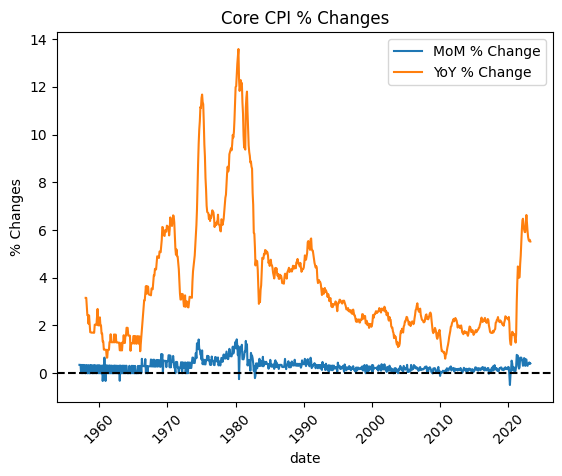

In [2]:
# Plot MoM_Percentage_Change and YoY_Percentage_Change
plt.plot(corecpi_data['date'], corecpi_data['MoM_Percentage_Change'], label='MoM % Change')
plt.plot(corecpi_data['date'], corecpi_data['YoY_Percentage_Change'], label='YoY % Change')

plt.xlabel('date')
plt.ylabel('% Changes')
plt.title('Core CPI % Changes')
plt.legend()
plt.xticks(rotation=45)

# Add a dashed line at y=0
plt.axhline(0, color='black', linestyle='--')

plt.show()

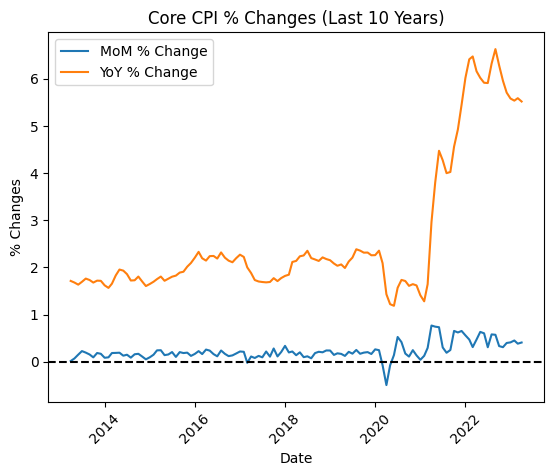

In [3]:
# Filter the DataFrame for the last 10 years
last_10_years_data = corecpi_data[corecpi_data['date'] >= corecpi_data['date'].max() - pd.DateOffset(years=10)]

# Plot MoM_Percentage_Change and YoY_Percentage_Change for the last 10 years
plt.plot(last_10_years_data['date'], last_10_years_data['MoM_Percentage_Change'], label='MoM % Change')
plt.plot(last_10_years_data['date'], last_10_years_data['YoY_Percentage_Change'], label='YoY % Change')

plt.xlabel('Date')
plt.ylabel('% Changes')
plt.title('Core CPI % Changes (Last 10 Years)')
plt.legend()
plt.xticks(rotation=45)

# Add a dashed line at y=0
plt.axhline(0, color='black', linestyle='--')

plt.show()

In [4]:
# Convert DataFrame to JSON
corecpi_json = corecpi_data.to_json(orient='records')

# Parse the JSON
data = json.loads(corecpi_json)

# Get the last item
last_item = data[-1]

print("MoM % Change: " + str(last_item['MoM_Percentage_Change']) + "% | Last Updated: " + str(corecpi_info.last_updated))
print("YoY % Change: " + str(last_item['YoY_Percentage_Change']) + "% | Last Updated: " + str(corecpi_info.last_updated))

MoM % Change: 0.4091862141% | Last Updated: 2023-05-10 07:40:19-05
YoY % Change: 5.5194157733% | Last Updated: 2023-05-10 07:40:19-05


In [5]:
print("Info: " + str(corecpi_info.id))
print("Title: " + str(corecpi_info.title))
print("Frequency: " + str(corecpi_info.frequency))
print("Units: " + str(corecpi_info.units))
print("Last Updated: " + str(corecpi_info.last_updated))
print("Popularity: " + str(corecpi_info.popularity))
print("Notes: " + str(corecpi_info.notes))

Info: CPILFESL
Title: Consumer Price Index for All Urban Consumers: All Items Less Food and Energy in U.S. City Average
Frequency: Monthly
Units: Index 1982-1984=100
Last Updated: 2023-05-10 07:40:19-05
Popularity: 83
Notes: The "Consumer Price Index for All Urban Consumers: All Items Less Food & Energy" is an aggregate of prices paid by urban consumers for a typical basket of goods, excluding food and energy. This measurement, known as "Core CPI," is widely used by economists because food and energy have very volatile prices. The Bureau of Labor Statistics defines and measures the official CPI, and more information can be found in the FAQ (https://www.bls.gov/cpi/questions-and-answers.htm) or in this article (https://www.bls.gov/opub/hom/pdf/cpihom.pdf).
